## 단어 임베딩 사용하기
* 단어와 벡터를 연관짓는 강력하고 인기 있는 또 다른 방법은 단어 임베딩이라는 밀집 단어 벡터를 사용하는 것임
* 원-핫 인코딩으로 만든 벡터는 희소하고(대부분 0으로 채워집니다) 고차원임(어휘 사전에 있는 단어의 수와 차원이 같음
* 반면 단어 임베딩은 저차원의 실수형 벡터임(희소 벡터의 반대인 밀집 벡터임)
* 원-핫 인코딩으로 얻은 단어 벡터와 달리 단어 임베딩은 데이터로부터 학습됨
* 보통 256차원, 512차원 또는 큰 어휘 사전을 다룰 때는 1,024차원의 단어 임베딩을 사용함
* 반면 원-핫 인코딩은 (20,000개의 토큰으로 이루어진 어휘 사전을 만들려면) 20,000차원 또는 그 이상의 벡터일 경우가 많음
* 따라서 단어 임베딩이 더 많은 정보를 적은 차원에 저장함

![word embeddings vs. one hot encoding](https://s3.amazonaws.com/book.keras.io/img/ch6/word_embeddings.png)

## 단어 임베딩을 만드는 방법 두 가지
* (문서 분류나 감성 예측과 같은) 관심 대상인 문제와 함께 단어 임베딩을 학습합니다. 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습합니다.
* 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드합니다. 이를 사전 훈련된 단어 임베딩이라고 합니다.

## 사전 훈련된 단어 임베딩 사용하기
* 이따금 훈련 데이터가 부족하면 작업에 맞는 단어 임베딩을 학습할 수 없습니다. 이럴 땐 어떻게 해야 할까요?
* 풀려는 문제와 함께 단어 임베딩을 학습하는 대신에 미리 계산된 임베딩 공간에서 임베딩 벡터를 로드할 수 있음
* 이런 임베딩 공간은 뛰어난 구조와 유용한 성질을 가지고 있어서 언어 구조의 일반적인 측면을 잡아낼 수 있음
* 자연어 처리에서 사전 훈련된 단어 임베딩을 사용하는 이유는 이미지 분류 문제에서 사전 훈련된 컨브넷을 사용하는 이유와 거의 동일함
* 충분한 데이터가 없어서 자신만의 좋은 특성을 학습하지 못하지만 꽤 일반적인 특성이 필요할 때에는 다른 문제에서 학습한 특성을 재사용하는 것이 합리적임 
* 단어 임베딩은 일반적으로 (문장이나 문서에 같이 등장하는 단어를 관찰하는) 단어 출현 통계를 사용하여 계산됨
* 여기에는 여러 가지 기법이 사용되는데 신경망을 사용하는 것도 있고 그렇지 않은 방법도 있음
* 단어를 위해 밀집된 저차원 임베딩 공간을 비지도 학습 방법으로 계산하는 아이디어는 요슈아 벤지오 등이 2000년대 초에 조사했음
* 연구나 산업 애플리케이션에 적용되기 시작된 것은 Word2vec 알고리즘이 등장한 이후임
* Word2vec 알고리즘은 2013년 구글의 토마스 미코로프가 개발하였으며 가장 유명하고 성공적인 단어 임베딩 방법임
* Word2vec의 차원은 성별 같은 구체적인 의미가 있는 속성을 잡아냄

## Keras 사전 훈련된 단어 임베딩 사용하기
* 케라스의 `Embedding` 층을 위해 내려받을 수 있는 미리 계산된 단어 임베딩 데이터베이스가 여럿 있음
* Word2vec
* GloVe(Global Vectors for Word Representation)
---
GloVe(Global Vectors for Word Representation)
* 2014년 스탠포드 대학의 연구자들이 개발한 것임
* 이 임베딩 기법은 단어의 동시 출현 통계를 기록한 행렬을 분해하는 기법을 사용함
* 이 개발자들은 위키피디아 데이터와 커먼 크롤 데이터에서 가져온 수백만 개의 영어 토큰에 대해서 임베딩을 미리 계산해 놓았음

## GloVe 임베딩을 케라스 모델에 적용하기
* 모든 내용을 적용하기: 원본 텍스트에서 단어 임베딩까지
* 문장들을 벡터의 시퀀스로 임베딩하고 펼친 다음 그 위에 `Dense` 층을 훈련함
* 여기서는 사전 훈련된 단어 임베딩을 사용하겠음
* 케라스에 포함된 IMDB 데이터는 미리 토큰화가 되어 있으나, 이를 사용하는 대신 원본 텍스트 데이터를 다운로딩해서 처음부터 시작하겠음

### 원본 IMDB 데이터 로딩 & 텍스트 목록 처리
* dataset : aclImdb,  [dataset download - stanford AI Lab](https://ai.stanford.edu/~amaas/data/sentiment/)
* 훈련용 리뷰 하나를 문자열 하나로 만들어 훈련 데이터를 문자열의 리스트로 구성함. 리뷰 레이블(긍정/부정)도 `labels` 리스트로 만들것임

In [1]:
import os, sys
sys.path.append('..')

imdb_dir = '../datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [2]:
print(type(texts), len(texts), len(texts[0]), len(texts[1]))
print(texts[0])

<class 'list'> 25000 655 4466
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.


### 데이터 토큰화
* 텍스트를 벡터로 만들고 훈련 세트와 검증 세트로 나누겠음
* 사전 훈련된 단어 임베딩은 훈련 데이터가 부족한 문제에 특히 유용하므로, 훈련 데이터를 처음 200개의 샘플로 제한함
* 이 모델은 200개의 샘플을 학습한 후에 영화 리뷰를 분류할 것임

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

Using TensorFlow backend.


In [4]:
maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

88582개의 고유한 토큰을 찾았습니다.


In [5]:
data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

print(data[:1])

데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)
[[  34   44 7576 1414   15    3 4252  514   43   16    3  633  133   12
     6    3 1301  459    4 1751  209    3 7693  308    6  676   80   32
  2137 1110 3008   31    1  929    4   42 5120  469    9 2665 1751    1
   223   55   16   54  828 1318  847  228    9   40   96  122 1484   57
   145   36    1  996  141   27  676  122    1  411   59   94 2278  303
   772    5    3  837   20    3 1755  646   42  125   71   22  235  101
    16   46   49  624   31  702   84  702  378 3493    2 8422   67   27
   107 3348]]


In [6]:
# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])  # [    0     1     2 ... 24997 24998 24999]
np.random.shuffle(indices)  # [17111 13459  7667 ...  7042  3541 21362]
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(200, 100) (200,) (10000, 100) (10000,)


### GloVe 단어 임베딩 내려받기
* [download](https://nlp.stanford.edu/projects/glove/)
* 2014년 영문 위키피디아를 사용해 사전에 계산된 임베딩을 내려받음
* 이 파일의 이름은 glove.6B.zip이고 압축 파일 크기는 823MB임
* 400,000만개의 단어(또는 단어가 아닌 토큰)에 대한 100차원의 임베딩 벡터를 포함하고 있음

### 임베딩 전처리
* 압축 해제한 파일(.txt 파일)을 파싱하여 단어(즉 문자열)와 이에 상응하는 벡터 표현(즉 숫자 벡터)를 매핑하는 인덱스를 만듬

In [7]:
glove_dir = '../datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [8]:
print(type(embeddings_index['the']), embeddings_index['the'].shape)
print(embeddings_index['the'][:5])

<class 'numpy.ndarray'> (100,)
[-0.038194 -0.24487   0.72812  -0.39961   0.083172]


### 임베딩 전처리
* `Embedding` 층에 주입할 수 있도록 임베딩 행렬을 만듬
* 이 행렬의 크기는 `(max_words, embedding_dim)`이어야 함
* 이 행렬의 `i`번째 원소는 (토큰화로 만든) 단어 인덱스의 `i`번째 단어에 상응하는 `embedding_dim` 차원 벡터이
* 인덱스 `0`은 어떤 단어나 토큰도 아닐 경우를 나타냄

In [9]:
print(len(word_index))
[[w, i] for w, i in word_index.items()][:3]

88582


[['the', 1], ['and', 2], ['a', 3]]

In [10]:
embedding_dim = 100
max_words = 10000

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [11]:
print(embedding_matrix.shape)
embedding_matrix[1][:5]

(10000, 100)


array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ])

### 모델 정의하기

이전과 동일한 구조의 모델을 사용하겠습니다:

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen)) # 10000, 100, 100
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### 모델에 GloVe 임베딩 로드하기
* `Embedding` 층은 하나의 가중치 행렬을 가짐
* 이 행렬은 2D 부동 소수 행렬이고 각 `i`번째 원소는 `i`번째 인덱스에 상응하는 단어 벡터임
* 모델의 첫 번째 층인 `Embedding` 층에 준비된 GloVe 행렬을 로드하자
* 추가적으로 `Embedding` 층을 동결함(`trainable` 속성을 `False`로 설정함). 

In [13]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

### 모델 훈련과 평가
* 모델을 컴파일하고 훈련함

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.3211 - acc: 0.5050 - val_loss: 0.6978 - val_acc: 0.5272
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6605 - acc: 0.6050 - val_loss: 0.7423 - val_acc: 0.5169
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3841 - acc: 0.8350 - val_loss: 0.9909 - val_acc: 0.5110
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3622 - acc: 0.8200 - val_loss: 0.7610 - val_acc: 0.5319
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2617 - acc: 0.9000 - val_loss: 0.9300 - val_acc: 0.5198
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1660 - acc: 0.9600 - val_loss: 1.1206 - val_acc: 0.4966
Epoch 7/10
200/200 [==============================] - 1s 3ms/s

* 이제 모델의 성능을 그래프로 그려 보자

In [15]:
import matplotlib.pyplot as plt

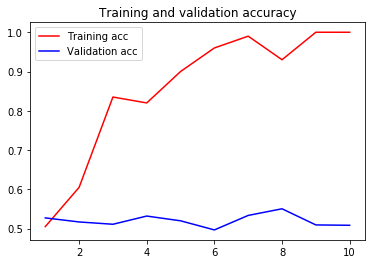

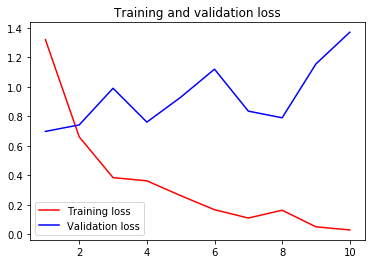

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

* 이 모델은 과대적합이 빠르게 시작됩니다. 훈련 샘플 수가 작기 때문에 놀라운 일은 아닙니다. 같은 이유로 검증 정확도와 훈련 정확도 사이에 차이가 큽니다. 검증 정확도는 50% 초반을 달성한 것 같습니다.
* 훈련 샘플 수가 적기 때문에 어떤 샘플 200개를 선택했는지에 따라 성능이 크게 좌우됩니다.
* 사전 훈련된 단어 임베딩을 사용하지 않거나 임베딩 층을 동결하지 않고 같은 모델을 훈련할 수 있습니다. 이런 경우 해당 작업에 특화된 입력 토큰의 임베딩을 학습할 것입니다. 데이터가 풍부하게 있다면 사전 훈련된 단어 임베딩보다 일반적으로 훨씬 성능이 높습니다.

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/20
200/200 [==============================] - 1s 5ms/step - loss: 0.6872 - acc: 0.5750 - val_loss: 0.6975 - val_acc: 0.4975
Epoch 2/20
200/200 [==============================] - 1s 4ms/step - loss: 0.4931 - a

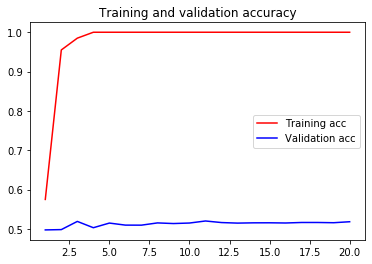

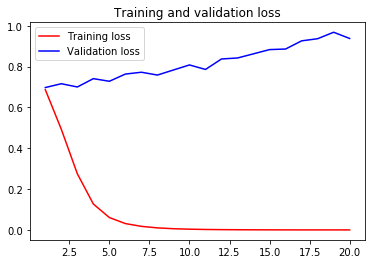

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

* 검증 정확도는 51% 정도임

훈련 샘플의 수를 2000개로 늘려서 확인해 보겠음

In [19]:
training_samples = 2000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [20]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 2000 samples, validate on 10000 samples
Epoch 1/20
2000/2000 [==============================] - 2s 937us/step - loss: 0.6997 - acc: 0.5770 - val_loss: 0.6720 - val_acc: 0.6044
Epoch 2/20
2000/2000 [==============================] - 2s 927us/step - loss: 0.1789 - acc: 0.9755 - val_loss: 0.6486 - val_acc: 0.6541
Epoch 3/20
2000/2000 [==============================] - 2s 908us/step - loss: 0.0295 - acc: 0.9980 - val_loss: 0.6515 - val_acc: 0.6808
Epoch 4/20
2000/2000 [==============================] - 2s 960us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.6904 - val_acc: 0.6929
Epoch 5/20
2000/2000 [==============================] - 2s 958us/step - loss: 2.5101e-04 - acc: 1.0000 - val_loss: 0.7534 - val_acc: 0.7029
Epoch 6/20
2000/2000 [==============================] - 2s 995us/step - loss: 1.7009e-05 - acc: 1.0000 - val_loss: 0.8427 - val_acc: 0.7064
Epoch 7/20
2000/2000 [==============================] - 2s 967us/step - loss: 1.4853e-06 - acc: 1.0000 - val_loss: 0.8758 - val

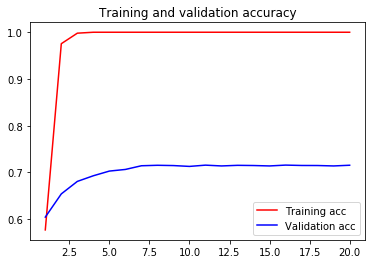

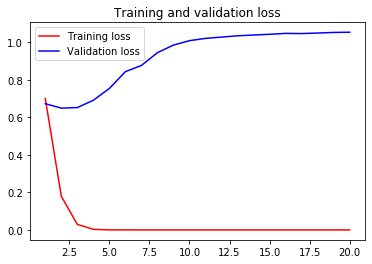

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

* 훈련 샘플의 수를 늘리니 단어 임베딩을 같이 훈련하는 모델의 검증 정확도가 70%를 넘었음

마지막으로 테스트 데이터에서 모델을 평가해 보죠. 먼저 테스트 데이터를 토큰화해야 합니다:

In [22]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

그다음 첫 번째 모델을 로드하고 평가합니다:

In [23]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 57us/step


[1.3619498208069802, 0.51232]

테스트 정확도는 겨우 51% 정도입니다. 적은 수의 훈련 샘플로 작업하는 것은 어려운 일이군요!